I am going to begin, like always, with Installing and running all necessary liberries and models. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('financials.csv')
df.head(5)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


Now, this step will fill the null enteries with the mean of its feature.

In [4]:
df1 = df.apply(lambda x: x.fillna(x.mean))
df1.isnull().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
SEC Filings       0
dtype: int64

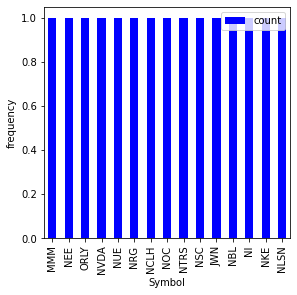

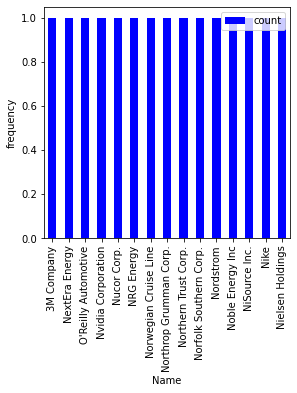

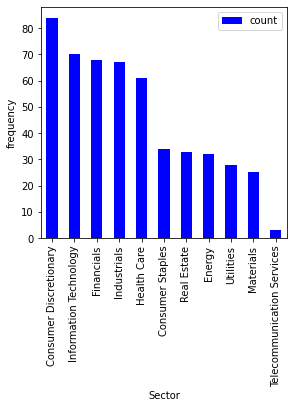

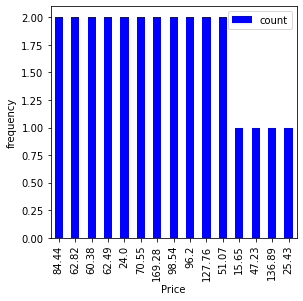

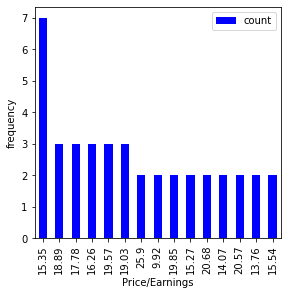

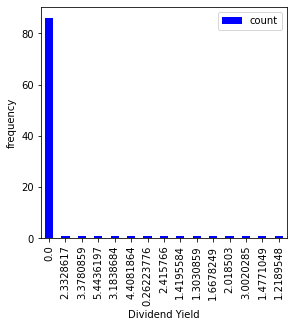

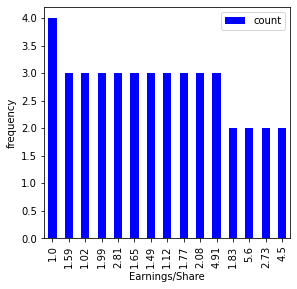

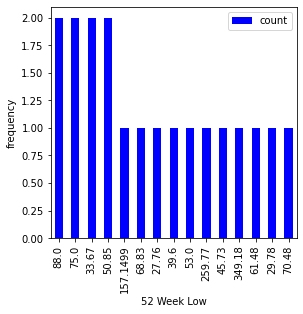

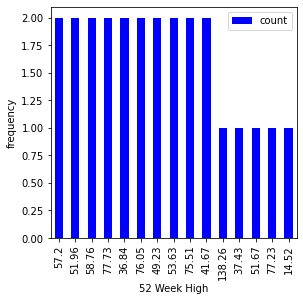

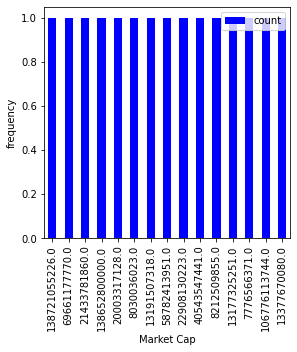

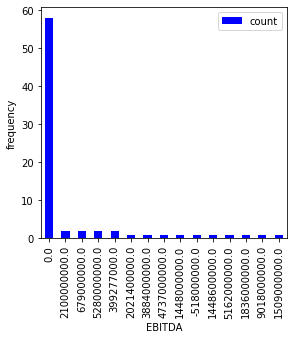

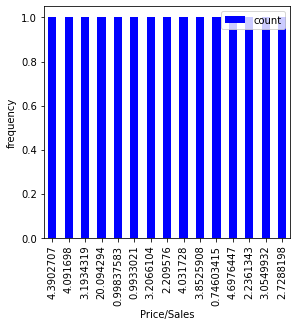

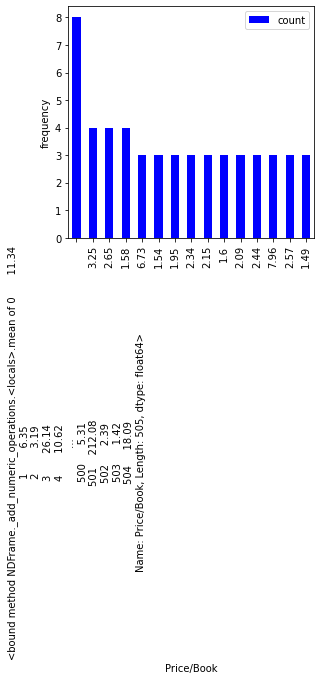

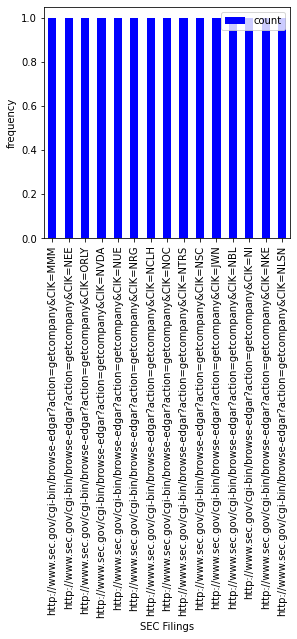

In [5]:
for i in range(len(df1.columns)):
    plt.figure(figsize=(15,40))
    plt.subplot(8, 3, i+1)
    df1[df1.columns[i]].value_counts().head(15).plot(kind= 'bar', color= 'blue')
    plt.xlabel(df1.columns[i])
    plt.ylabel('frequency')
    plt.legend()
plt.show()

This step will create a features out of the 'Name' column to use it as predictor for the 
'Price'. then join the two datasets together. 

In [6]:
dum = pd.get_dummies(df1['Name'], dtype= int)
df1 = df1.drop('Name', axis= 'columns')
df1 = pd.concat([df1, dum], axis= 'columns')

df1.head(5)


,Symbol,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,...,XL Capital,Xcel Energy Inc,Xerox Corp.,Xilinx Inc,Xylem Inc.,Yum! Brands Inc,Zimmer Biomet Holdings,Zions Bancorp,Zoetis,eBay Inc.
0,MMM,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,...,0,0,0,0,0,0,0,0,0,0
1,AOS,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,...,0,0,0,0,0,0,0,0,0,0
2,ABT,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,...,0,0,0,0,0,0,0,0,0,0
3,ABBV,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,...,0,0,0,0,0,0,0,0,0,0
4,ACN,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,...,0,0,0,0,0,0,0,0,0,0


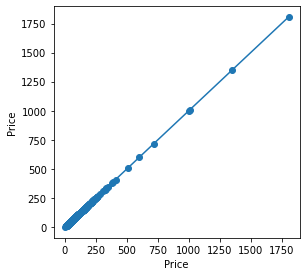

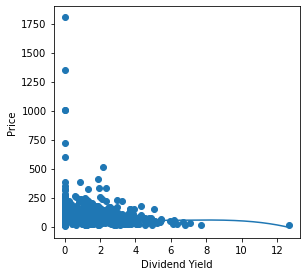

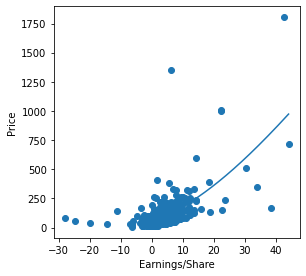

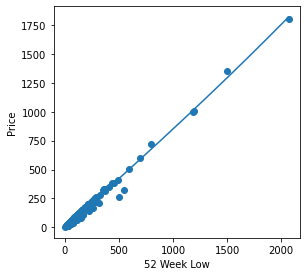

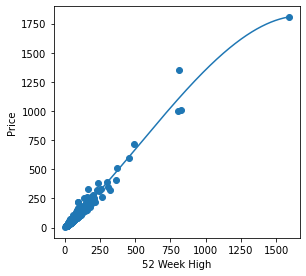

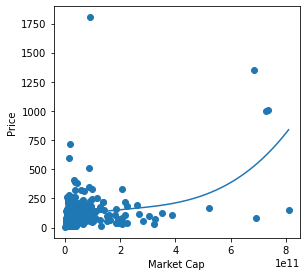

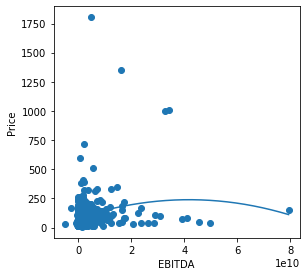

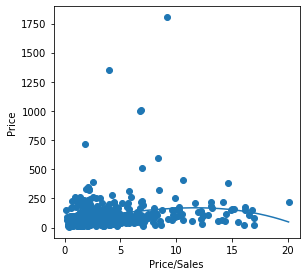

In [7]:
scale = StandardScaler()

numerical_feature = []

for col in df1.columns:
     if df1[col].dtype == np.int64 or df1[col].dtype == np.float64:
      numerical_feature.append(col)

for i in range(len(numerical_feature)):
     plt.figure(figsize=(15,40))
     plt.subplot(8, 3, i+1)
     model = np.poly1d(np.polyfit(df1[numerical_feature[i]], df1.Price, 3))
     line = np.linspace(0, max(df1[numerical_feature[i]]), len(df1[numerical_feature[i]]))
     plt.scatter(df1[numerical_feature[i]], df1.Price)
     plt.plot(line, model(line))
     plt.xlabel(numerical_feature[i])
     plt.ylabel('Price')
plt.show()

In [8]:
X = df1.drop(['Price', 'Symbol','Sector', 'Price/Book',
              'SEC Filings', 'Price/Earnings'], axis= 'columns')

y = df1['Price']

In [9]:

def best_fit_model(X, y):
    alg= {
        'lin_reg': {
            'model': LinearRegression(), 
            'params': {
                'positive': [True, False]
            }
        },
        'RFR': {
            'model': RandomForestRegressor(),
            'params': {
                'criterion': ['absolute_error', 'friedman_mse'],
                'max_features': ['sqrt', 'log2']
            }
        },
        'DTR': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['absolute_error', 'friedman_mse'],
                'splitter': ['best', 'random'] 
            }
        }
    }
    score = []
    ss = ShuffleSplit(n_splits= 5, test_size= 0.2, random_state=0)
    for alg_name , config in alg.items(): 
        clf = GridSearchCV(config['model'], config['params'], cv=ss, return_train_score= False, error_score= 'raise')
        clf.fit(X, y)
        score.append({
            'model_name': alg_name, 
            'score': clf.best_score_,
            'parameters': clf.best_params_
            })
    return(pd.DataFrame(score, columns= ['model_name', 'score', 'parameters']))

best_fit_model(X, y)

,model_name,score,parameters
0,lin_reg,0.979478,{'positive': False}
1,RFR,0.776551,"{'criterion': 'friedman_mse', 'max_features': ..."
2,DTR,0.943273,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [10]:
X1 = df1.drop(['Price', 'Symbol','Sector', 'Price/Book',
              'SEC Filings', 'Price/Earnings'], axis= 'columns')

y1 = df1[['Price']]


X_scaled = scale.fit_transform(X1)
y_scaled = scale.fit_transform(y1)

In [11]:


X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size= 0.2, random_state= 40)

clf = LinearRegression(positive= False)
clf.fit(X_train, y_train)



acc = r2_score(y_train, clf.predict(X_train))

acc

0.99999999999938

In [12]:
def predict_price(Name, DY ,ES, LOW, HIGH,MarketCap, EBITDA , PS):    
    loc_index = np.where(X.columns==Name)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = DY
    x[1] = ES
    x[2] = LOW
    x[3] = HIGH
    x[4] = MarketCap
    x[5] = EBITDA
    x[6] = PS
    if loc_index >= 0:
        x[loc_index] = 1

    return clf.predict([x])[0]



In [14]:
predict_price('Nvidia Corporation', 3.5, 4.7, 50.6, 100.0, 1000000000000.0, 9000000000.0, 7.5)

C:\Users\Hussein\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([86.24400568])